<a target="_blank" href="https://colab.research.google.com/github/evaalonsoortiz/ELE8812-demos/blob/main/Demos/Lesson%204/Le%C3%A7on_4_Demo_shift.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# ELE8812 - Traitement fréquentiel

## Démo :  Interprétation des fréquences discrètes

### Référence : DIP 4e édition, Chapitre 4, Example 4.13 p.250

Dans ce démo, la transformée de Fourier (TF) d’une image sera calculée. Afin de mieux visualiser le module de la TF, une transformation logarithmique sera effectuée (`np.log`) et le spectre des fréquences sera centré (`np.fft.fftshift`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,12)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/evaalonsoortiz/ELE8812-demos.git Repo

Cloning into 'Repo'...
remote: Enumerating objects: 336, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 336 (delta 91), reused 148 (delta 54), pack-reused 93
Receiving objects: 100% (336/336), 30.14 MiB | 22.19 MiB/s, done.
Resolving deltas: 100% (103/103), done.


## Image originale

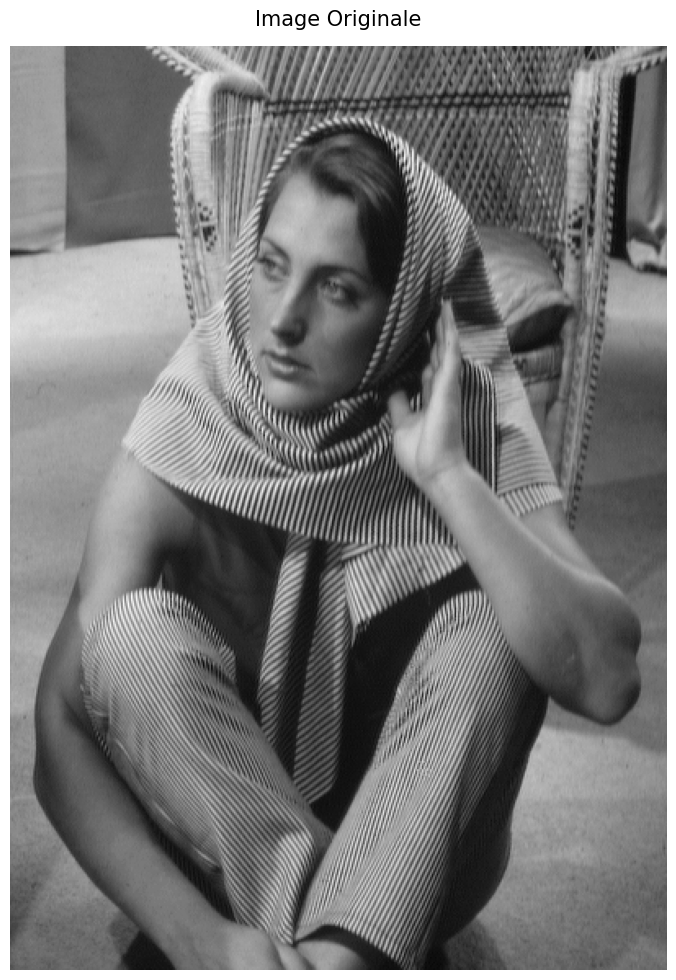

In [3]:
# Charger image
A = plt.imread('Repo/Data/Barbara.tif');

plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

## Module et Log-Module de la transformée de Fourier

En regardant de près l’image de gauche, il est possible de voir un pixel de forte intensité dans le coin supérieur gauche de l’image. Ce pixel correspond à la fréquence (0,0) (*dc term*) et a une valeur beaucoup plus élevée que les autres valeurs du module de la TF. Ainsi, la gamme dynamique des autres valeurs plus faibles est compressée par rapport à cette valeur élevée qui domine la représentation visuelle. Effectuer une transformation logarithmique étale la gamme des valeurs pour les fréquences autres que (0,0) et permet d’avoir un meilleur aperçu du contenu fréquentiel présent dans l’image.

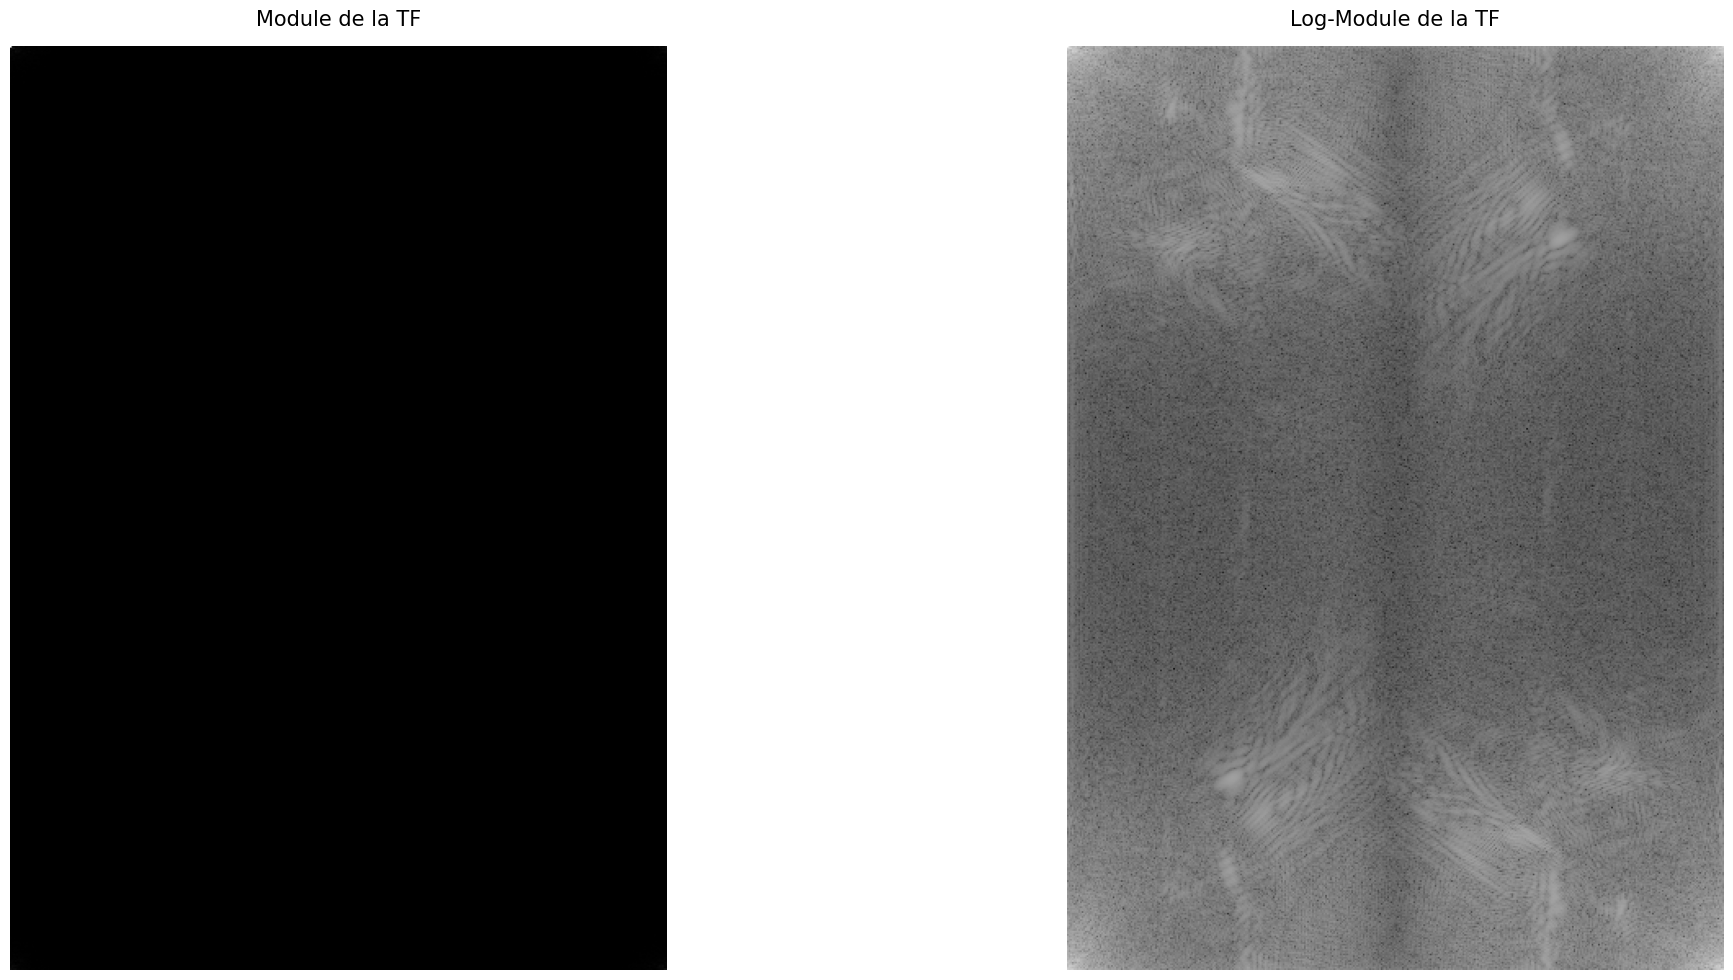

In [4]:
B = np.fft.fft2(np.double(A))

plt.subplot(121); plt.imshow(np.abs(B), cmap='gray'); plt.title('Module de la TF'); plt.axis('off');
plt.subplot(122); plt.imshow(np.log(np.abs(B)), cmap='gray'); plt.title('Log-Module de la TF'); plt.axis('off'); plt.show();

## Shift de la transformée de Fourier

Comme mentionné à l’exemple précédent, dans le résultat de la TF, la fréquence (0,0) est située dans le coin supérieur gauche de l’image. Dans les 3 autres quadrants, les basses fréquences se trouvent également dans les coins en bordure de l’image. Chaque quadrant appartient en fait à une période distincte de la TF 2D de l’image (voir la figure 4.22 du manuel DIP 4e édition p.242 pour une représentation visuelle). La fonction `np.fft.fftshift` échange le quadrant 1 (supérieur droit) avec le quadrant 3 (inférieur gauche) et le quadrant 2 (supérieur gauche) avec le quadrant 4 (inférieur droit). Ceci permet une représentation plus intuitive du spectre des fréquences. On peut aussi mieux visualiser la symétrie par rapport à la fréquence (0,0).

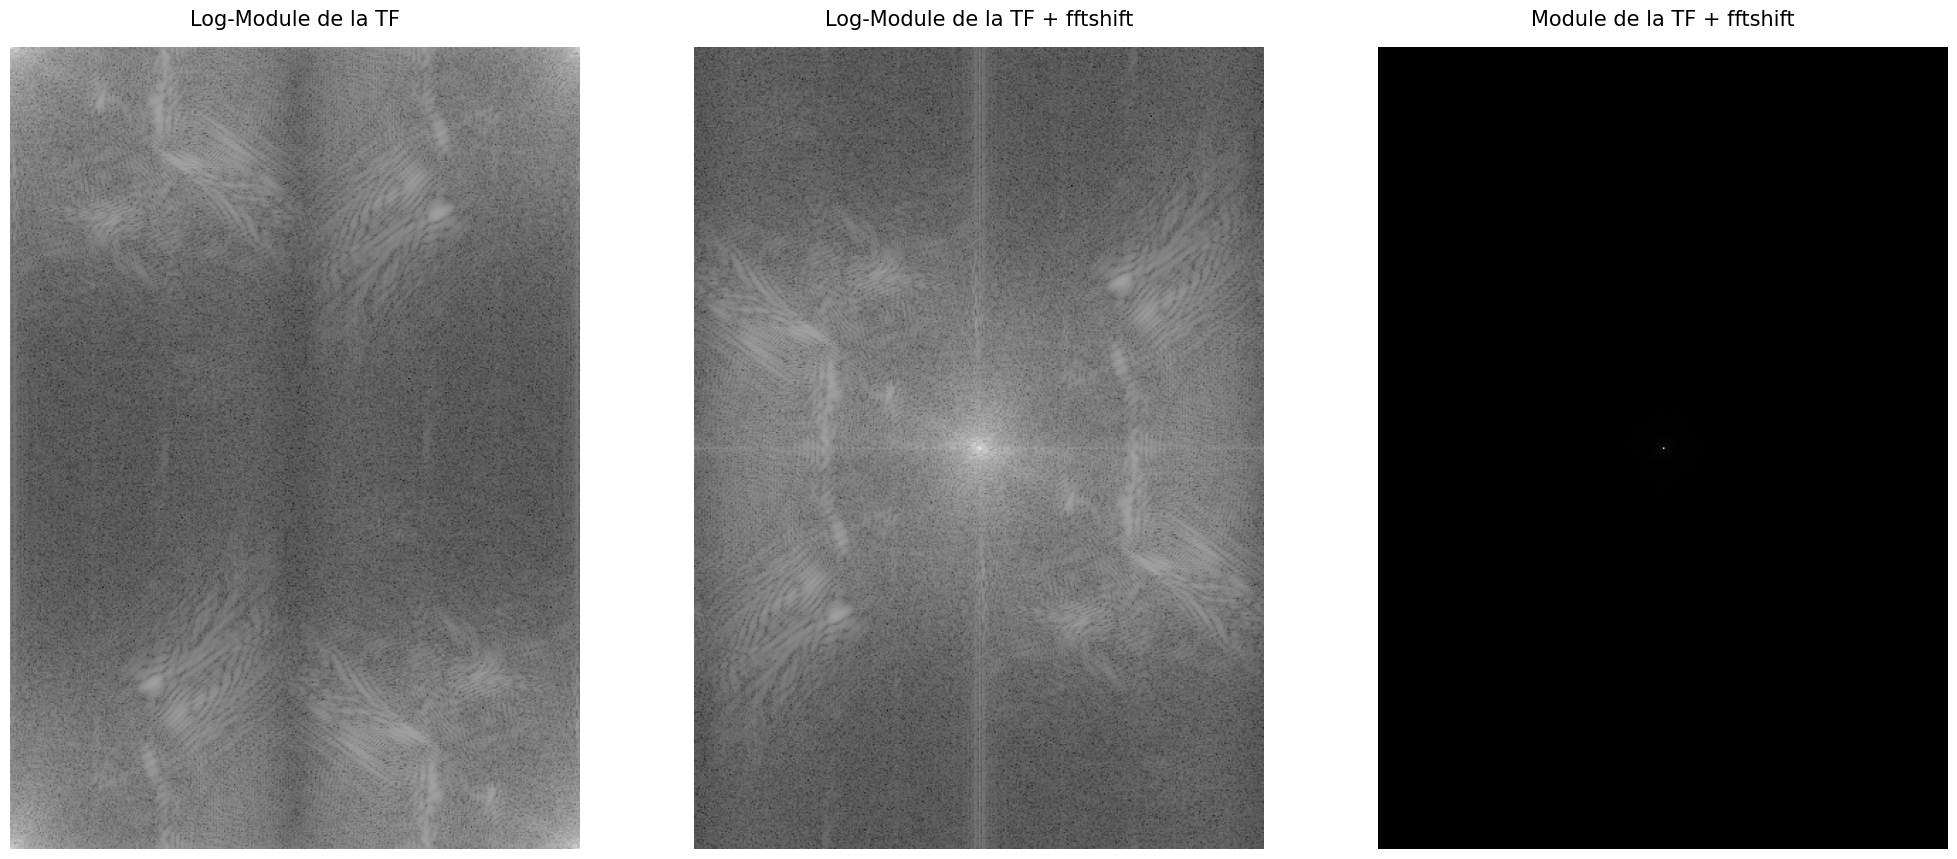

In [7]:
C = np.fft.fftshift(B)

plt.subplot(131); plt.imshow(np.log(np.abs(B)), cmap='gray'); plt.title('Log-Module de la TF'); plt.axis('off');
plt.subplot(132); plt.imshow(np.log(np.abs(C)), cmap='gray'); plt.title('Log-Module de la TF + fftshift'); plt.axis('off');
plt.subplot(133); plt.imshow(np.abs(C), cmap='gray'); plt.title('Module de la TF + fftshift'); plt.axis('off'); plt.show();